# Principal Component Analysis

In this Jupyter notebook, we shall apply the **principal component analysis** (**PCA**) to extract *factors* from the [datasets](http://archive.ics.uci.edu/ml/datasets/Student+Performance) introduced in the README file and, thus, reduce the dimension of the datasets.

## Libraries

In [1]:
# Numerical library
import numpy as np

# Libraries to handle data
import pandas as pd
from scripts import data_wrangling as dw

# Data Visualization
from matplotlib import pyplot as plt
import seaborn as sns
from scripts import dataviz

In [3]:
# Magic commands
%load_ext autoreload
%autoreload 2

## Dataset

Since PCA is restricted to *continuous numerical variables*, we must filter non-continuous variables from the datasets. To properly perform this task, we created the class `Dataset` in the Python script `scripts/data_wrangling.py`. We shall build a single dataframe with the student's grades in mathematics and Portuguese. Thus, we shall consider only students with valid grades in both subjects. Overall, there will be 6 variables in the dataframe: `mat_G1`, `mat_G2`, `mat_G3`, `por_G1`, `por_G2`, and `por_G3`.

In [4]:
# Dataset object from the script data_wrangling
dataset = dw.Dataset()

# Get dataset from students with grades in both subjects
df = dataset.get_df(subject = 'both', dtype = 'float')
    
# Let us rescale the grades so that the maximum will be 10 instead of 20
df *= 0.5

df

,G1_mat,G2_mat,G3_mat,G1_por,G2_por,G3_por
0,2.5,3.0,3.0,0.0,5.5,5.5
1,2.5,2.5,3.0,4.5,5.5,5.5
2,3.5,4.0,5.0,6.0,6.5,6.0
3,7.5,7.0,7.5,7.0,7.0,7.0
4,3.0,5.0,5.0,5.5,6.5,6.5
...,...,...,...,...,...,...
377,3.5,4.5,4.0,7.5,7.5,8.0
378,3.0,2.5,0.0,3.5,4.0,3.5
379,3.0,2.5,0.0,5.5,6.0,4.5
380,7.0,8.0,8.0,5.0,5.0,5.0


### Descriptive statistics

In [5]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
G1_mat,382.0,5.430628,1.674584,1.5,4.000,5.25,6.5,9.5
G2_mat,382.0,5.356021,1.916280,0.0,4.125,5.50,6.5,9.5
G3_mat,382.0,5.193717,2.343620,0.0,4.000,5.50,7.0,10.0
G1_por,382.0,6.056283,1.278266,0.0,5.000,6.00,7.0,9.5
G2_por,382.0,6.119110,1.234171,2.5,5.500,6.00,7.0,9.5
G3_por,382.0,6.257854,1.472719,0.0,5.500,6.50,7.0,9.5


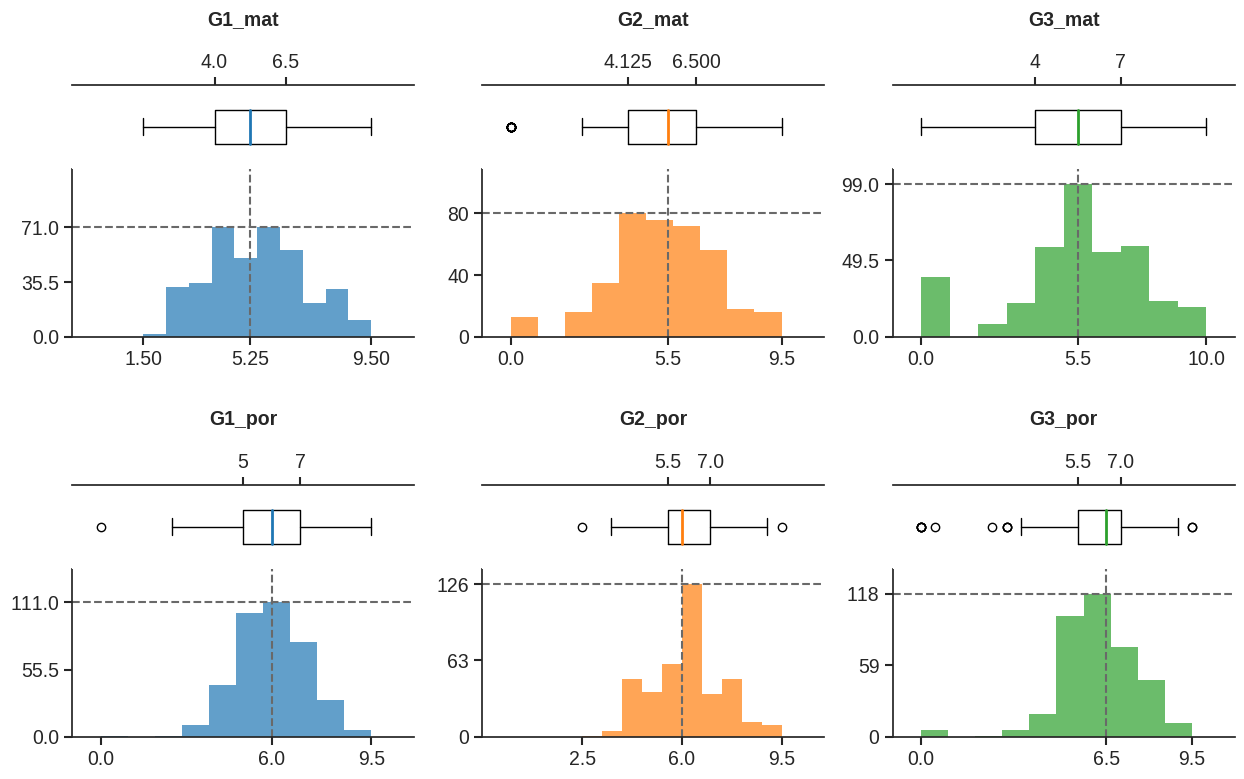

In [9]:
desc_stats = dataviz.DescStats(
        [
            df[[label + '_mat' for label in ['G1', 'G2', 'G3']]], 
            df[[label + '_por' for label in ['G1', 'G2', 'G3']]]
        ],
        share_all_x = True,
        share_row_y = True,
        plot_titles = True
    )

#desc_stats.save()

The means and medians of math grades are smaller than the means and medians of Portuguese grades, whereas the variances in math grades are greater than the variances of Portuguese grades. Furthermore, there are much more low grades in math than in Portuguese. Overall, the students do better in Portuguese than in mathematics.

### Normality of each grade

Let us test the normality of each grade by the **Kolmogorov-Smirnov test**.

## Correlation matrix

## Data Screening

### Low Correlations

#### Kaiser-Meyer-Olkin test

#### Bartlett's sphericity test

### Multicollinearity

Since the process of finding **factors** is basically a **multiple linear regression problem**, we must make sure of the lack of **multicollinearity**, which is a strong or perfect (**singularity**) linear relation between two or more variables.